In [1]:
import pandas as pd
data = pd.read_csv("diamonds.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [2]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
stats  = data.describe()
latex_table = stats.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrrrrrrr}
\toprule
 & carat & depth & table & price & x & y & z \\
\midrule
count & 53940.00 & 53940.00 & 53940.00 & 53940.00 & 53940.00 & 53940.00 & 53940.00 \\
mean & 0.80 & 61.75 & 57.46 & 3932.80 & 5.73 & 5.73 & 3.54 \\
std & 0.47 & 1.43 & 2.23 & 3989.44 & 1.12 & 1.14 & 0.71 \\
min & 0.20 & 43.00 & 43.00 & 326.00 & 0.00 & 0.00 & 0.00 \\
25% & 0.40 & 61.00 & 56.00 & 950.00 & 4.71 & 4.72 & 2.91 \\
50% & 0.70 & 61.80 & 57.00 & 2401.00 & 5.70 & 5.71 & 3.53 \\
75% & 1.04 & 62.50 & 59.00 & 5324.25 & 6.54 & 6.54 & 4.04 \\
max & 5.01 & 79.00 & 95.00 & 18823.00 & 10.74 & 58.90 & 31.80 \\
\bottomrule
\end{tabular}



In [7]:
print(data['cut'].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


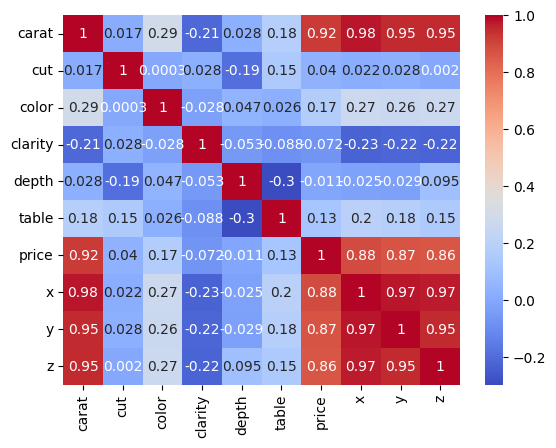

In [8]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

encodedData = data.copy()

# Encode categorical columns
for col in ['cut', 'color', 'clarity']:
    encoder = LabelEncoder()
    encodedData[col] = encoder.fit_transform(encodedData[col])

correlation_matrix = encodedData.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

From the heatmap above we can see that the diamonsions of the diamond, the carat and the price have a strong correlation.

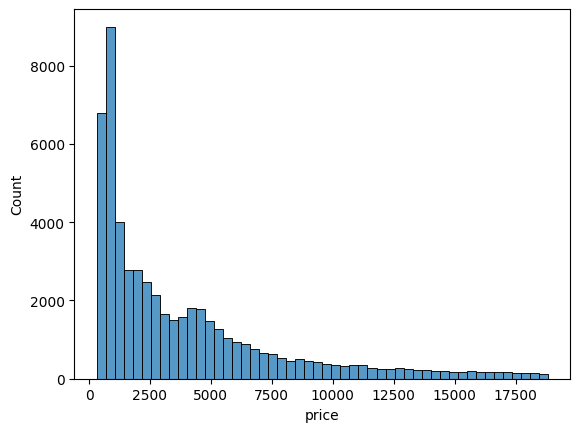

In [9]:
sns.histplot(data['price'], bins=50)
plt.show()

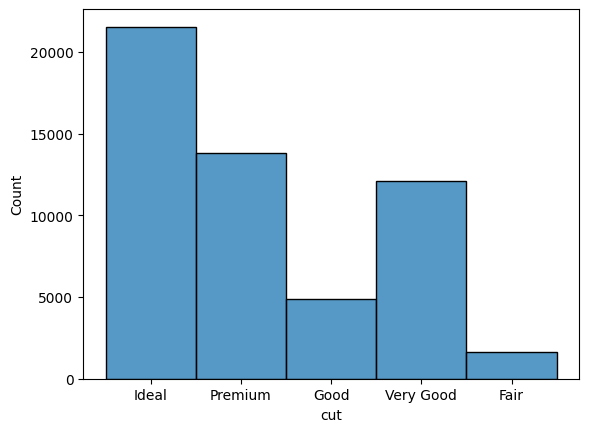

In [10]:
sns.histplot(data['cut'], bins=50)
plt.show()

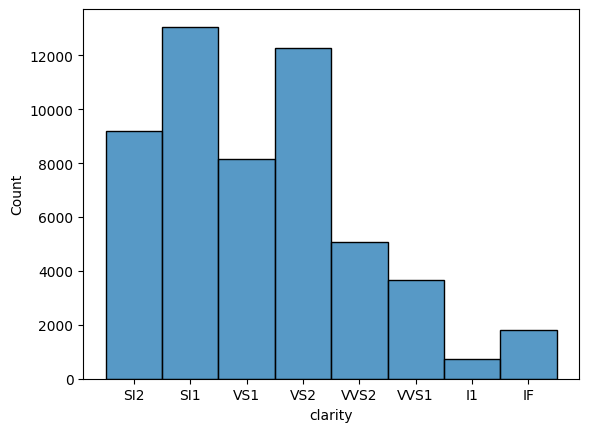

In [11]:
sns.histplot(data['clarity'], bins=50)
plt.show()

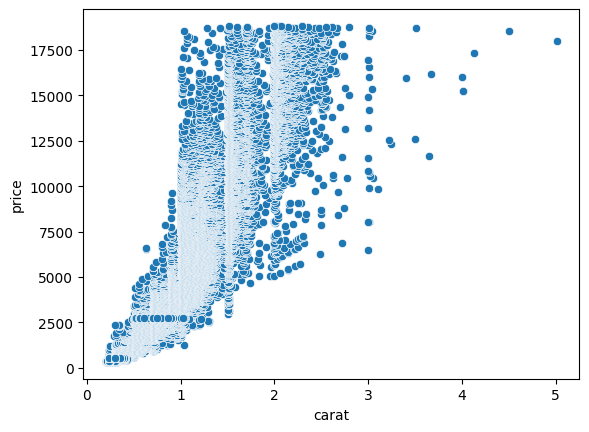

In [12]:
sns.scatterplot(x='carat', y='price', data=data)
plt.show()

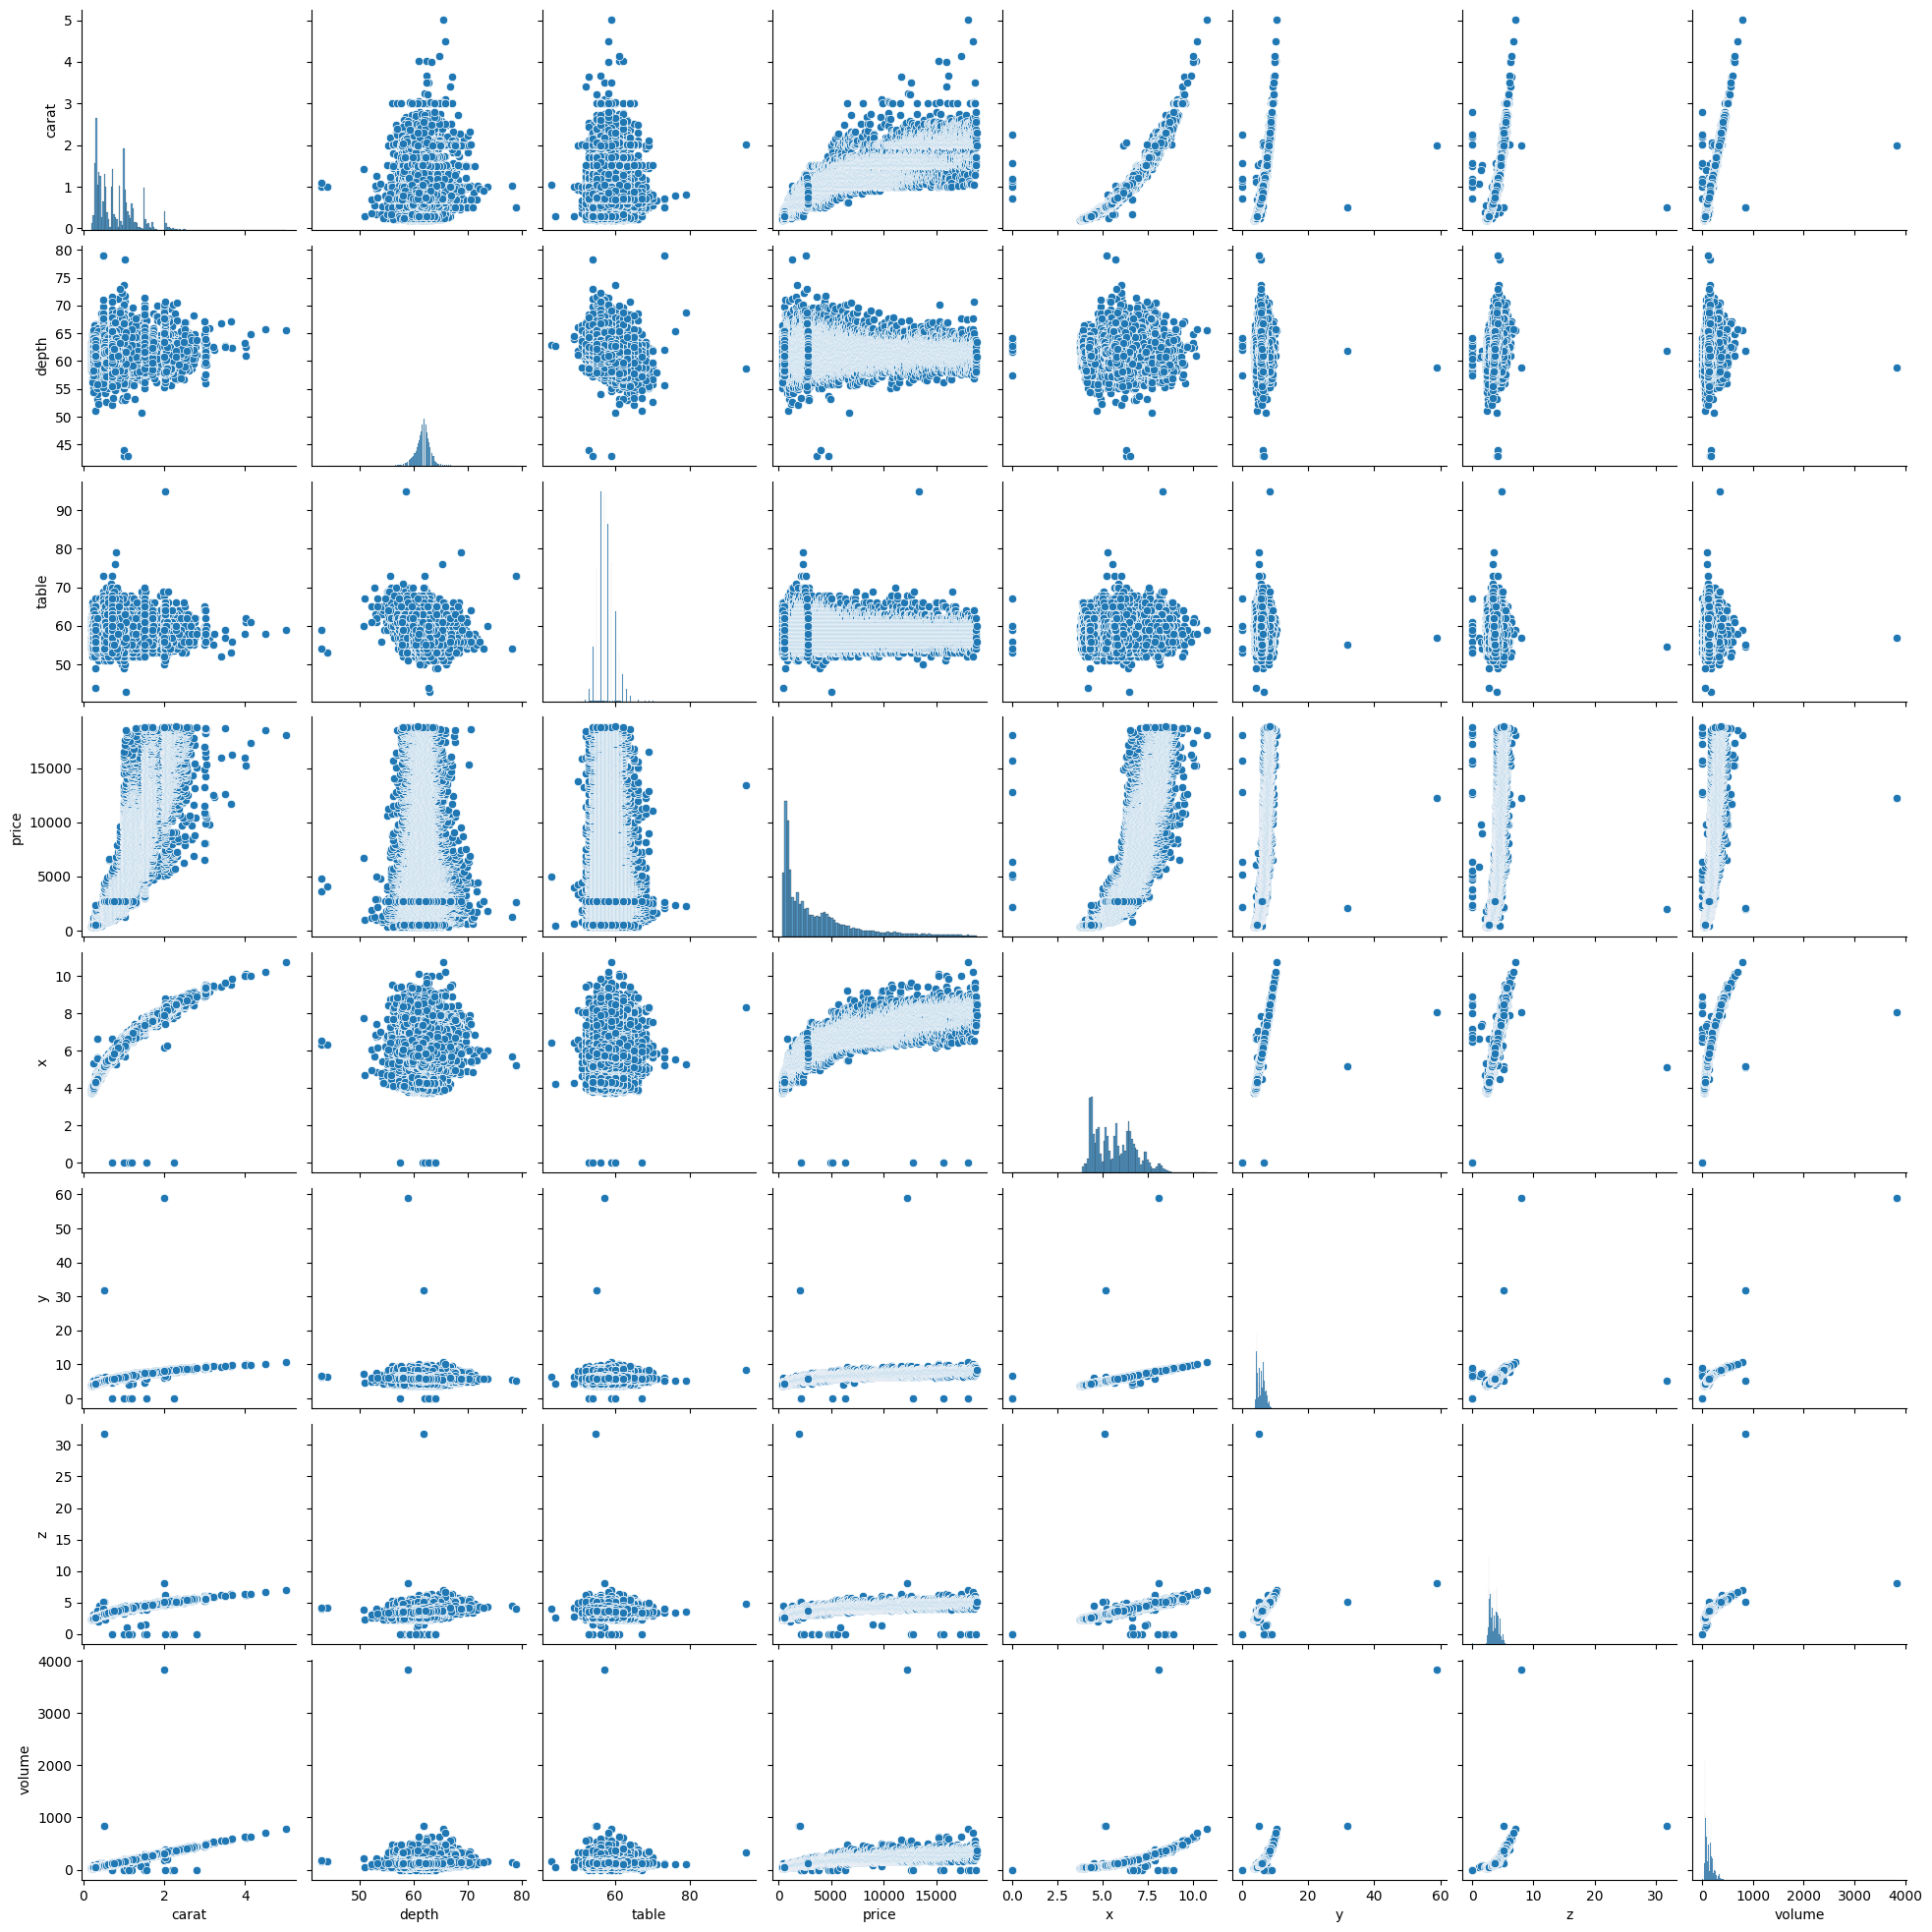

In [17]:
sns.pairplot(data)
plt.show()

In [14]:
data['volume'] = data['x'] * data['y'] * data['z']

Let's see how important our features are for our tasks:

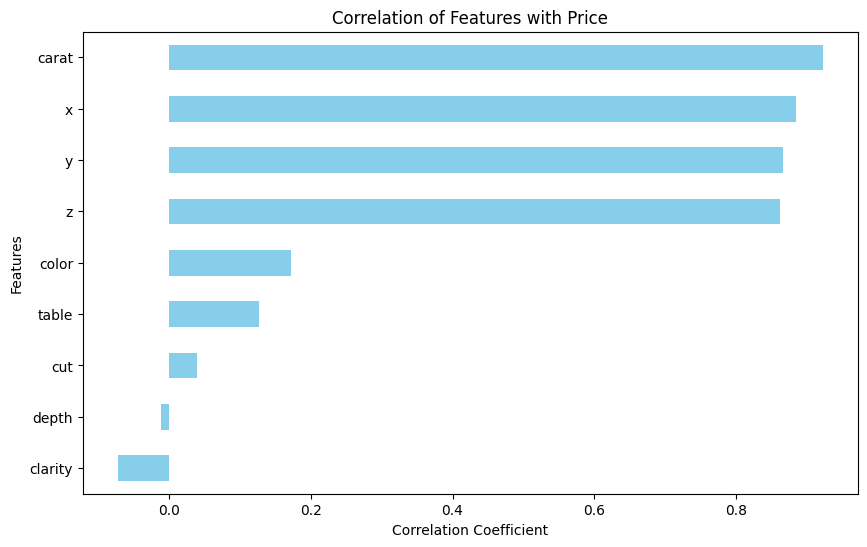

In [15]:
data_copy = encodedData.copy()

correlations = data_copy.corr()['price'].drop('price')

plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()


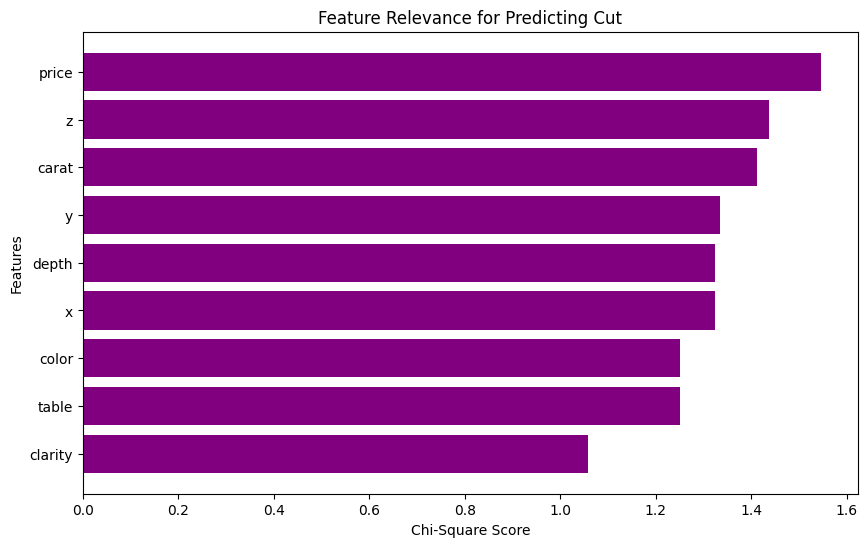

In [2]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual dataset)
data = pd.DataFrame({
    'carat': [0.23, 0.31, 0.45, 0.52, 0.75],
    'cut': ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
    'color': ['D', 'E', 'F', 'G', 'H'],
    'clarity': ['IF', 'VVS1', 'VVS2', 'VS1', 'SI1'],
    'depth': [61.5, 60.4, 62.1, 63.0, 59.8],
    'table': [55, 57, 58, 56, 54],
    'price': [326, 950, 2500, 4000, 6000],
    'x': [3.95, 4.31, 5.2, 5.4, 6.0],
    'y': [3.98, 4.32, 5.22, 5.38, 6.01],
    'z': [2.43, 2.60, 3.23, 3.40, 3.59]
})

# Encode ordered categorical columns
data_encoded = data.copy()

# Encoding cut, color, and clarity with order
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

data_encoded['cut'] = data_encoded['cut'].apply(cut_order.index)
data_encoded['color'] = data_encoded['color'].apply(color_order.index)
data_encoded['clarity'] = data_encoded['clarity'].apply(clarity_order.index)

# Scale numeric features for chi-square test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_encoded.drop('cut', axis=1))
y_cut = data_encoded['cut']

# Perform chi-square test
chi_scores, p_values = chi2(X_scaled, y_cut)

# Create a DataFrame for chi-square scores
chi_scores_df = pd.DataFrame({
    'Feature': data_encoded.drop('cut', axis=1).columns,
    'Chi-Square Score': chi_scores
}).sort_values(by='Chi-Square Score', ascending=False)

# Plot chi-square scores using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(chi_scores_df['Feature'], chi_scores_df['Chi-Square Score'], color='purple')
plt.title("Feature Relevance for Predicting Cut")
plt.xlabel("Chi-Square Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()
